<a href="https://colab.research.google.com/github/k3robotics/ML-Essentials/blob/main/IntermediateLinAlg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# imports
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

#### Eigenvectors and Eigenvalues
*  Eigenvectors will not change in orientation or magnitude if a transformation matrix is applied to an original matrix, such as an image broken down into a pixel grid.
* The eigenvalue of an eigenvector describes the tranformation magnitude of the eigenvector. For example, if a 'flipping matrix' is applied to an original matrix and there are two vectors orthogonal to each other, then only the vector on the x-axis will change direction. This is still an eigenvector because the angle of the vector has not changed but the orientation has changed. However, the original eigenvalue was 1 and when the vector is rotated 180 degrees the eigenvalue becomes -1.  If a transformation was applied and the x-axis eigenvector was shortened to half its original magnitude then the eigenvalue would change to 0.5. Likewise, if the eigenvector was doubled in magnitude then the eigenvalue would be 2. If a shearing matrix is applied then the eigenvector oriented on the y-axis is not an eigenvector because the angle of the vector has been taken off span (vertical and then not vertical).
* The eigenvalue is a scalar multiple that tells us how an eigenvector is adjusted if it even is adjusted.

#### Eigendecomposition
* We can plot some vectors and see how applying matrices to these vectors transforms them. Then we can find the eigenvectors and eigenvalues of the matrices that are applied to the vectors.


In [3]:
v = np.array([3, 1])
v

array([3, 1])

We can plot $\vec{v}$ using Hadrien Jean's `plotVectors` function.

In [4]:
def plotVectors(vecs, cols, alpha=1):
  """
  Plot a set of vectors.

  Parameters
  ----------
  vecs: array-like
    Coordinates of the vectors to plot. Each vectors is in an array. For example, [[1, 3], [2, 2]] can be used to plot 2 vectors.
  cols: array-like
    Colors of the vectors. For example, ['red', 'blue'] will display the first vector in red and the second in blue.
  alpha: float
    Opacity of the vectors.

  Returns:

    fig : an instance of matplotlib.figure.Figure
      The figure of the vectors.
  """
  plt.figure()
  plt.axvline(x=0, color='#A9A9A9', zorder=0)
  plt.axhline(y=0, color='#A9A9A9', zorder=0)

  for i in range(len(vecs)):
    x = np.concatenate([[0, 0], vecs[i]])
    plt.quiver([x[0]],
               [x[1]],
               [x[2]],
               [x[3]],
               angles='xy', scale_units='xy', scale=1, color=cols[i], alpha=alpha)


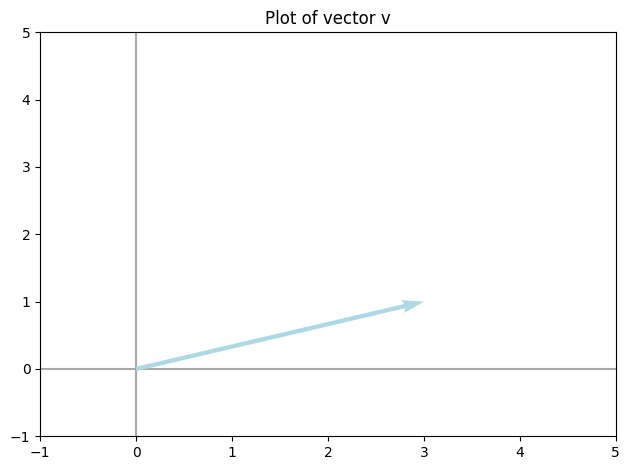

In [28]:
# plot vector v
plotVectors([v], cols=['lightblue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Plot of vector v')
plt.tight_layout()
plt.show()

* By applying a matrix to a vector(i.e., perform a matrix-vector multiplication) we can linearly transform the vector, e.g., rotate it or rescale it.
* However, applying an Identity Matrix will not transform the vector at all.

In [23]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [24]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [25]:
v == Iv

array([ True,  True])

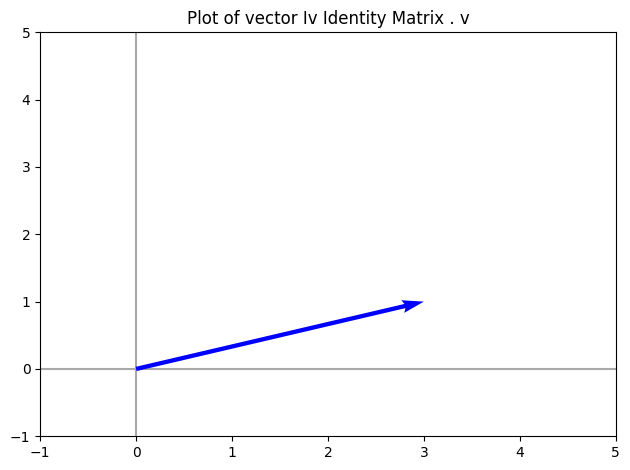

In [27]:
plotVectors([Iv], cols=['blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Plot of vector Iv Identity Matrix . v')
plt.tight_layout()
plt.show()

*  Now we can apply a non-identity matrix, $\matrix{A}$ to $\vec{v}$ and see how it is transformed.

In [29]:
A = np.array([ [-1, 4], [2, -2] ])
A

array([[-1,  4],
       [ 2, -2]])

In [30]:
Av = np.dot(A, v)
Av

array([1, 4])

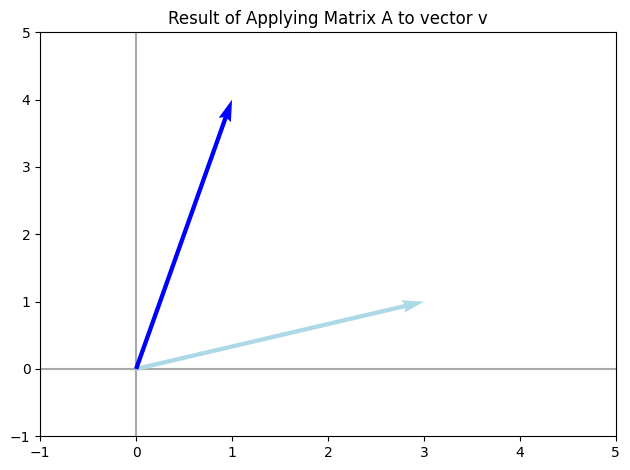

In [31]:
plotVectors([v, Av], cols=['lightblue', 'blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Result of Applying Matrix A to vector v')
plt.tight_layout()
plt.show()

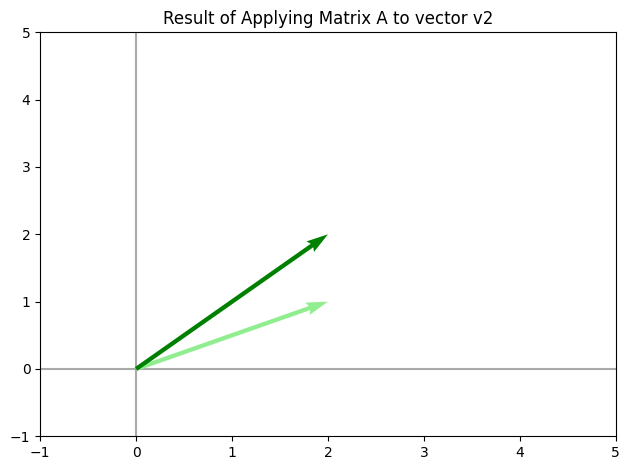

In [32]:
# another example of applying a matrix to a vector
v2 = np.array([2, 1])
plotVectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Result of Applying Matrix A to vector v2')
plt.tight_layout()
plt.show()

*  Now we can concatenate several vectors together into a matrix $\matrix{V}$, where each column in the matrix is a separate vector. If we apply linear transformations to $\matrix{V}$ the transformations will be applied independently to each column (vector).

In [33]:
v

array([3, 1])

In [34]:
# we need to convert an array to 2D to transpose into a column vector
np.matrix(v).T

matrix([[3],
        [1]])

In [35]:
# create some more vectors
v3 = np.array([-3, -1]) # mirror image of x over both axes
v4 = np.array([-1, 1])

In [36]:
# Now we can build V by concatenating vectors v - v4 as column matrices
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                    axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [37]:
# if we apply the identity matrix to V then we should just get V back
IV = np.dot(I,V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [38]:
# if we apply the matrix A to matrix V then A will trnasform all of the four columns
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [39]:
# function to convert column of matrix to a 1D vector:
def vectorfy(mtrx, clmn):
  return np.array(mtrx[:,clmn]).reshape(-1)

In [40]:
vectorfy(V, 0)

array([3, 1])

In [41]:
vectorfy(V, 0) == v

array([ True,  True])

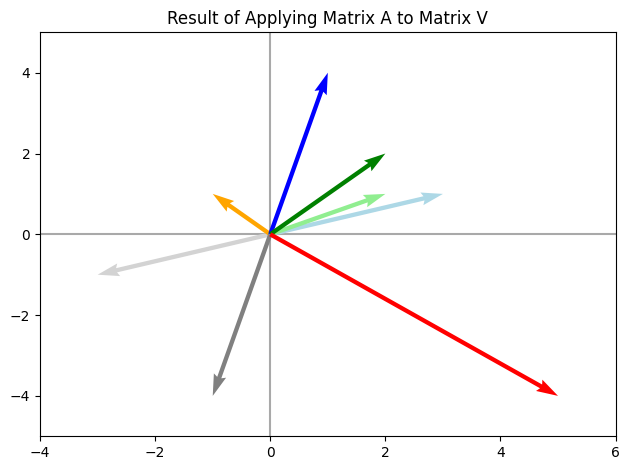

In [42]:
plotVectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgrey', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
plt.ylim(-5, 5)
plt.title('Result of Applying Matrix A to Matrix V')
plt.tight_layout()
plt.show()
